In [34]:
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Pre-Processing phase

In [35]:
def view(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

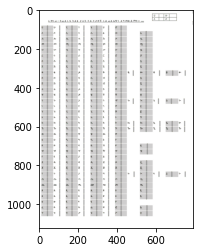

In [36]:
img = cv2.imread('geez_1.png')
view(img)

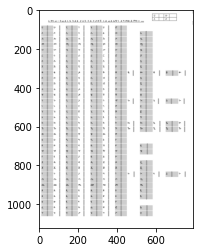

In [37]:
#make it gray
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

view(gray_image)
# cv2.imwrite('temp_geez_1.png',gray_image)

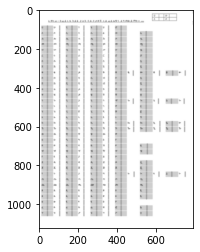

In [38]:
#make it blury
view(cv2.GaussianBlur(gray_image, (7,7),0))
# cv2.imwrite('blur_geez_1.png',gray_image)

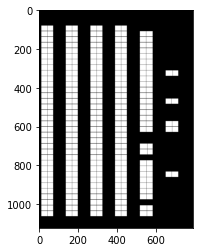

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


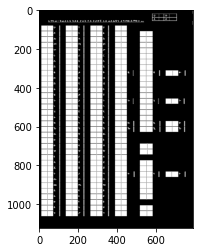

In [39]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
view(opening)

dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
view(dist_transform)
# cv2.imwrite('dist_geez_1.png',thresh)

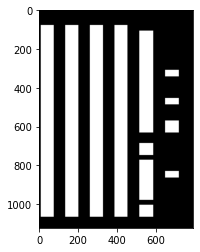

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


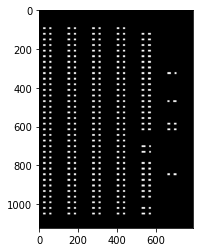

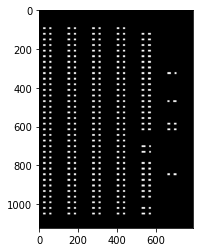

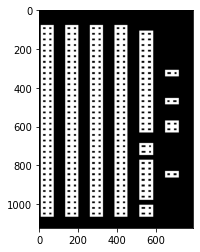

In [40]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
view(sure_bg)

#sure foreground
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
view(sure_fg)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
view(sure_fg)  

unknown = cv2.subtract(sure_bg,sure_fg)
view(unknown)  
# cv2.imwrite('temp.png',sure_fg)

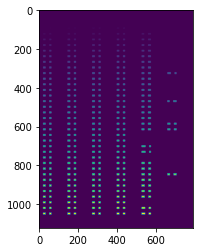

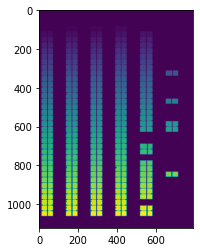

In [12]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1

plt.imshow(markers)
plt.show()

markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)

img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()
# cv2.imwrite('temp.png',markers)

In [1]:
import os
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt

per = 10

def view(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
imgq = cv2.imread('geez_1.png')
h,w,c = imgq.shape
imgq = cv2.resize(imgq,(w//3,h//3))

orb = cv2.ORB_create(300000)
kp1, des1 = orb.detectAndCompute(imgq,None)
#imgKP1 = cv2.drawKeypoints(imgq,kp1,None)

path = 'test'
myPicList = os.listdir(path)
print(myPicList)

for j,y in enumerate(myPicList):
    img = cv2.imread(path +"/"+y)
    h,w,c = img.shape
    img = cv2.resize(img,(w//3,h//3))
    #cv2.imshow(y, img)
    kp2, des2 = orb.detectAndCompute(img,None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.match(des2,des1)
    #matches.sort(key= lambda x: x.distance)
    good = matches[:int(len(matches)*(per/100))]
    imgMatch = cv2.drawMatches(img,kp2,imgq,kp1,good,None,flags =2)
    cv2.imshow(y, imgMatch)
    


#cv2.imshow('output1',imgKP1)
#cv2.imshow('output2',imgq)
cv2.waitKey(0)

['dist_geez_1.png', 'geez_1.png']


-1

In [15]:
import numpy as np
import cv2 as cv
filename = 'geez_1.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0, 255,0]
# img = cv2.resize(img,(w//2,h//2))
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

In [16]:
import numpy as np
import cv2 as cv
img = cv.imread('geez_1.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


gray = np.float32(opening)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0, 255,0]

# img = cv2.resize(img,(w//2,h//2))
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('geez_1.png',0)
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
# cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 2365
Total Keypoints without nonmaxSuppression: 16399


True

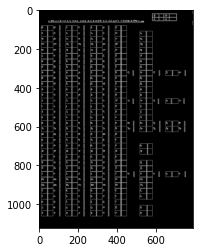

In [32]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('geez_1.png',0)
# edges = cv.Canny(img,100,200)
# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.plot(1220),plt.imshow(edges,cmap = 'gray')
plt.savefig('result/test/black2.png',dpi=350)
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.savefig('result/test/black.png')
plt.show()

# Attempt 0

In [2]:
import cv2
import random

scale=0.5
circles=[]
counter=0
counter2=0
point1=[]
point2=[]
myPoints=[]
myColor=[]
def mousePoints(event,x,y,flags,parans):
    global counter,point1,point2,counter2,circles,myColor
    if event == cv2.EVENT_LBUTTONDOWN:
        if counter ==0:
            point1=int(x//scale),int(y//scale);
            counter +=1
            myColor = (random.randint(0,2)*200,random.randint(0,2)*200,random.randint(0,2)*200)
        elif counter ==1:
            point2=int(x//scale),int(y//scale)
            name = input('Enter Name: ')
            myPoints.append([point1,point2,name])
            counter=0
        circles.append([x,y,myColor])
        counter2 += 1

img = cv2.imread('geez_1.png')
img = cv2.resize(img, (0,0), None, scale, scale)

while True:
    #tp display points
    for x,y,color in circles:
        cv2.circle(img,(x,y),3,color,cv2.FILLED)
    cv2.imshow('Orignal Image',img)
    cv2.setMouseCallback('Orignal Image', mousePoints)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        print(myPoints)
        cv2.destroyAllWindows()
        break
    

Enter Name: ሀ
Enter Name: ለ
Enter Name: ሐ
Enter Name: መ
Enter Name: ሠ
[[(44, 82), (74, 108), 'ሀ'], [(44, 108), (74, 138), 'ለ'], [(44, 138), (76, 166), 'ሐ'], [(44, 166), (74, 196), 'መ'], [(44, 196), (74, 224), 'ሠ']]


# Attempt 1

In [5]:
# Project: How to Detect and Draw Contours in Images Using OpenCV
# Author: Addison Sears-Collins
# Date created: February 28, 2021
# Description: How to detect and draw contours around objects in 
# an image using OpenCV.
 
import cv2 # Computer vision library
 
# Read the color image
image = cv2.imread("geez_1.png")
 
# Make a copy
new_image = image.copy()
 
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# Display the grayscale image
cv2.imshow('Gray image', gray)  
cv2.waitKey(0) # Wait for keypress to continue
cv2.destroyAllWindows() # Close windows
 
# Convert the grayscale image to binary
ret, binary = cv2.threshold(gray, 100, 255, 
  cv2.THRESH_OTSU)
 
# Display the binary image
cv2.imshow('Binary image', binary)
cv2.waitKey(0) # Wait for keypress to continue
cv2.destroyAllWindows() # Close windows
 
# To detect object contours, we want a black background and a white 
# foreground, so we invert the image (i.e. 255 - pixel value)
inverted_binary = ~binary
cv2.imshow('Inverted binary image', inverted_binary)
cv2.waitKey(0) # Wait for keypress to continue
cv2.destroyAllWindows() # Close windows
 
# Find the contours on the inverted binary image, and store them in a list
# Contours are drawn around white blobs.
# hierarchy variable contains info on the relationship between the contours
contours, hierarchy = cv2.findContours(inverted_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
     
# Draw the contours (in red) on the original image and display the result
# Input color code is in BGR (blue, green, red) format
# -1 means to draw all contours
with_contours = cv2.drawContours(image, contours, -1,(255,0,255),3)
cv2.imshow('Detected contours', with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Show the total number of contours that were detected
print('Total number of contours detected: ' + str(len(contours)))
 
# Draw just the first contour
# The 0 means to draw the first contour
first_contour = cv2.drawContours(new_image, contours, 0,(255,0,255),3)
cv2.imshow('First detected contour', first_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()
 
# Draw a bounding box around the first contour
# x is the starting x coordinate of the bounding box
# y is the starting y coordinate of the bounding box
# w is the width of the bounding box
# h is the height of the bounding box
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(first_contour,(x,y), (x+w,y+h), (255,0,0), 5)
cv2.imshow('First contour with bounding box', first_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()
 
# Draw a bounding box around all contours
for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # Make sure contour area is large enough
    if (cv2.contourArea(c)) > 10:
    cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
    
cv2.imshow('All contours with bounding box', with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

IndentationError: expected an indented block (Temp/ipykernel_9408/3386506221.py, line 79)

In [24]:
import cv2
import numpy as np
def box_extraction(img_for_box_extraction_path, cropped_dir_path):
    img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
    (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
    img_bin = 255-img_bin  # Invert the image
    cv2.imwrite("geez_2.png",img_bin)
   
    # Defining a kernel length
    kernel_length = np.array(img).shape[1]//40
     
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect verticle lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
    # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # For Debugging
    # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
    cv2.imwrite("img_final_bin.jpg",img_final_bin)
    # Find contours for image, which will detect all the boxes
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
    idx = 0
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        # If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
        if (w > 80 and h > 20) and w > 3*h:
            idx += 1
            new_img = img[y:y+h, x:x+w]
            cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
box_extraction("geez_1.png", "./Cropped/")

In [13]:
!pip install ipywidgets

# Attempt 2

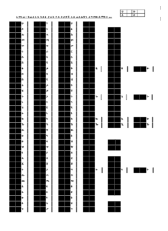

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'
# Read the image
img = cv2.imread("geez_2.png", 0)

 # Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
cv2.imwrite("Images/Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin);

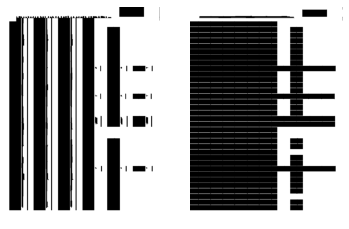

In [37]:
def f(x):
    # Defining a kernel length
    global horizontal_lines_img, verticle_lines_img, kernel
    kernel_length = np.array(img).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("Images/verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
    plt.imshow(verticle_lines_img);
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
    plt.imshow(horizontal_lines_img);
    plt.axis('off')

interact(f,  x=widgets.IntSlider(min=1,max=255,step=1,value=50));

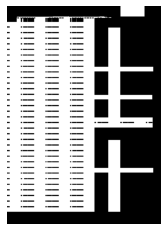

In [38]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_final_bin)

In [39]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

In [40]:
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    # If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        plt.subplot(10,1, idx)
        plt.imshow(new_img )
        plt.axis('off')

# Disecting Countur

In [50]:
import cv2

image= cv2.imread('dataset1/form 1.png')
original_image = image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 50,200)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)


for (i,c) in enumerate(sorted_contours):
    x,y,w,h= cv2.boundingRect(c)
    
    cropped_contour= original_image[y:y+h, x:x+w]
    image_name= "reslt/output_shape_number_" + str(i+1) + ".jpg"
    cv2.imwrite(image_name, cropped_contour)
#     readimage= cv2.imread(image_name)
#     cv2.imshow('Image', readimage)
#     cv2.waitKey(0)
    
# cv2.destroyAllWindows()

# Rename multiple files

In [9]:
import pandas as pd
import glob
import os

# set search path and glob for files
# here we want to look for csv files in the input directory
path = 'dataset1/'
number = 1
files = glob.glob(path + '*.*')

for f in files:
    # get filename
    old_name = os.path.basename(f)
    os.rename(path +old_name, path +"form "+str(number)+".png")
    number = number+1

print("Done Renaming "+str(number)+" file's")

Done Renaming 3 file's


# Display bulk of image file nicely

Library Import Done!



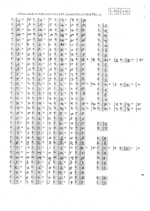
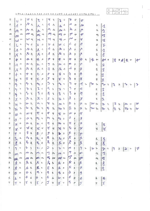
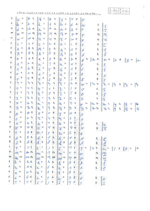
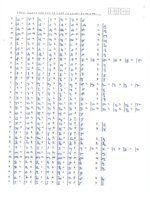
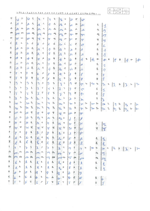


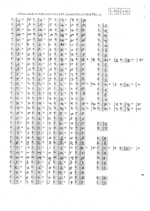
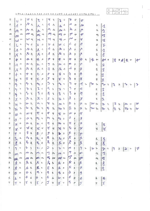
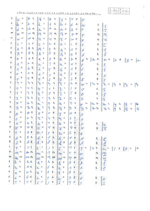
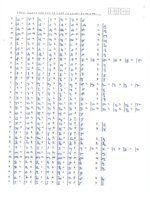
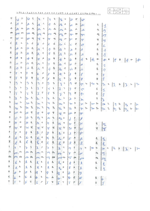

In [10]:
%load_ext autoreload
%autoreload 2
import sys
try:
    sys.path.append('../')
    import ipyplot
except:
    ! {sys.executable} -m pip install ipyplot
    import ipyplot
import glob
import os
import urllib.request
import zipfile
import numpy as np
from PIL import Image


print("Library Import Done!")

images = glob.glob('dataset1' + '/*.*')
images = [image.replace('\\', '/') for image in images]

labels = [image.split('/')[-2] for image in images]

# # Normy Displaying
# ipyplot.plot_images(images, max_images=20, img_width=100)

# # Display images in class tabs layout
# ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=5, img_width=150)

# # Using numpy.ndarray as images sequence
# images_np = np.asarray(images)
# ipyplot.plot_images(images_np, max_images=5)

## Displaying images using images as PIL.Image objects
images_pil = [Image.open(image) for image in images]
ipyplot.plot_images(images_pil, max_images=5)

# finale Preprocessor

box


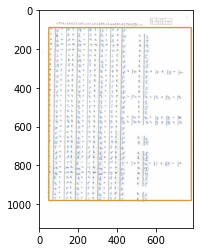

In [26]:
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

def view(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def rand_col_box(image, initial, final, color_interval, tickness):
    # get a copy of the image
    tmp = np.copy(image)
    # randomly Generate a color set
    red = random.randrange(0, 255, color_interval)
    green = random.randrange(0, 255, color_interval)
    blue = random.randrange(0, 255, color_interval)
    # draw box over it then return
    x,y = initial
    w,h = final
    return cv2.rectangle(tmp, (x,y), ((x+w),(y+h)), (red, green, blue), tickness)


def contours_process(processed_img, orignal_img):
    # get the edges
    edges= cv2.Canny(processed_img, 50,200)
    # detect contours
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # sort countors
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
    for (i,c) in enumerate(sorted_contours):
        # get the dimention of this specific contour
        x,y,w,h= cv2.boundingRect(c)
        # get the cordinate of this specific contour
        cropped_contour= orignal_img[y:y+h, x:x+w]
        # draw a color box aver it
        box = rand_col_box(orignal_img, (x,y), (w,h), 30, 6)
        print('box')
        view(box)
        print('countur')
        view(cropped_contour)
        print(x,y)
        #Crop the image 
#         image_name= "reslt/countur " + str(i+1) + ".png"
#         cv2.imwrite(image_name, cropped_contour)



img = cv2.imread('dataset1/form 100.png')
# make it gray
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# geting the threshold
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# contours_process(sure_bg, img)

box = rand_col_box(img, (50,90), (735,890), 30, 6)
print('box')
view(box)

cropped_contour= img[90:735+250, 50:890+55]
cropped_contour = cv2.resize(cropped_contour, (0,0), None, 0.7, 0.7)

cv2.imshow('box', cropped_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Training Phase

In [21]:
#!pip3 install torch torchvision torchaudio

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0
